In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm



In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Understanding the data : 

Checking the shape and finding the missing values.

In [29]:
df= pd.read_csv('/content/drive/My Drive/Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [30]:
df['Y house price of unit area'].max()

117.5

In [31]:
df['Y house price of unit area'].median()

38.45

In [32]:
df['X5 latitude'].median()

24.9711

In [33]:
df['X6 longitude'].median()

121.53863

There are no missing values in the dataset and thus no cleaning required.

In [59]:
df.isnull()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False,False


In [34]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

Checking the variations max and median of the house prices per unit area.

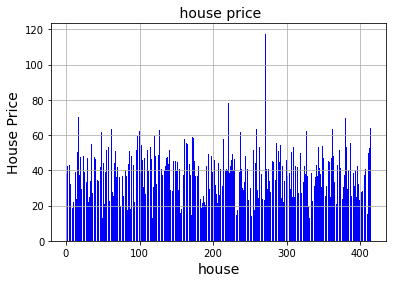

In [35]:
plt.bar(df['No'],df['Y house price of unit area'], color='blue')
plt.title(' house price', fontsize=14)
plt.xlabel('house', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

Checking relations of all the independent variables against the depended variables.

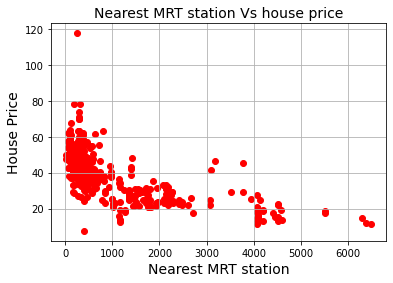

In [36]:
plt.scatter(df['X3 distance to the nearest MRT station'], df['Y house price of unit area'], color='red')
plt.title('Nearest MRT station Vs house price', fontsize=14)
plt.xlabel('Nearest MRT station', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

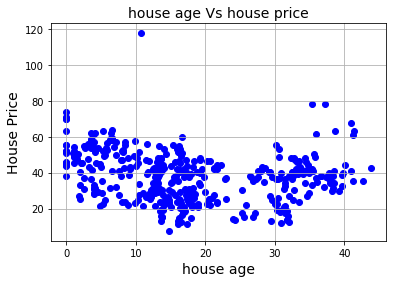

In [37]:
plt.scatter(df['X2 house age'], df['Y house price of unit area'], color='blue')
plt.title('house age Vs house price', fontsize=14)
plt.xlabel('house age', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

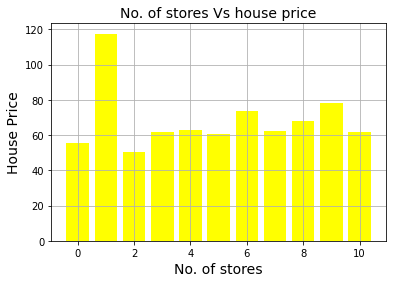

In [38]:
plt.bar(df['X4 number of convenience stores'], df['Y house price of unit area'], color='yellow')
plt.title('No. of stores Vs house price', fontsize=14)
plt.xlabel('No. of stores', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

In [44]:
df= pd.read_csv('/content/drive/My Drive/Real estate.csv')
df_linear_regression=df.drop(["No","X1 transaction date"],axis=1)

Removing all the unnecessary columns and performing regression.

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_linear_regression.drop("Y house price of unit area",axis=1), df_linear_regression['Y house price of unit area'], test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(331, 5) (331,)
(83, 5) (83,)


In [46]:
model= LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [47]:
df_linear_regression=df.drop(["No","X1 transaction date"],axis=1)

In [48]:
df_linear_regression.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [50]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -7422.149333251387
Coefficients: 
 [-2.54067590e-01 -3.72484953e-03  1.41345153e+00  2.06590481e+02
  1.89610976e+01]


In [51]:
r_sq = regr.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.6202640529811048


In [52]:
y_pred=regr.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test,y_pred)

133.1747663186728